In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Wear time analysis

In [104]:
weartime = pd.read_csv('WearTimes_Device.csv',header=[0,1])

In [105]:
weartime.head(3)

Unnamed: 0_level_0      CBR11                 CBR14                 CBR15  \
                Days SCO-Device CBR-Device SCO-Device CBR-Device SCO-Device   
0                  1       86.7       71.2       33.5       27.8       56.2   
1                  2       20.4        1.7        0.0        0.0       47.5   
2                  3        0.0       53.4        0.0        0.0       53.1   

                  CBR16                 CBR19    ...          CBR24  \
  CBR-Device SCO-Device CBR-Device SCO-Device    ...     SCO-Device   
0       86.2       69.7       74.0       48.7    ...           13.9   
1       61.8       32.0        0.0        0.0    ...           16.4   
2       51.4       27.3       42.0       16.3    ...           22.4   

                  CBR26                 CBR25                 CBR27  \
  CBR-Device SCO-Device CBR-Device SCO-Device CBR-Device SCO-Device   
0        6.3       88.0       28.6        NaN       32.7       49.1   
1       17.6       29.7        4.8        NaN       26.0        0.0   
2        0.2       17.4        0.0        NaN       31.4        0.6   

                  CBR28             
  CBR-Device SCO-Device CBR-Device  
0       10.4       44.9       39.2  
1        0.0        0.0        5.8  
2        0.0        6.5        0.0  

[3 rows x 25 columns]

In [106]:
weartime = weartime.drop('Unnamed: 0_level_0',axis=1)

/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  if __name__ == '__main__':


In [107]:
weartime.head(4)

CBR11                 CBR14                 CBR15             \
  SCO-Device CBR-Device SCO-Device CBR-Device SCO-Device CBR-Device   
0       86.7       71.2       33.5       27.8       56.2       86.2   
1       20.4        1.7        0.0        0.0       47.5       61.8   
2        0.0       53.4        0.0        0.0       53.1       51.4   
3        0.0       40.8        0.0        0.0       45.0       49.8   

       CBR16                 CBR19               ...          CBR24  \
  SCO-Device CBR-Device SCO-Device CBR-Device    ...     SCO-Device   
0       69.7       74.0       48.7       45.2    ...           13.9   
1       32.0        0.0        0.0        0.0    ...           16.4   
2       27.3       42.0       16.3        6.0    ...           22.4   
3       50.8       53.1        0.0        7.2    ...           22.9   

                  CBR26                 CBR25                 CBR27  \
  CBR-Device SCO-Device CBR-Device SCO-Device CBR-Device SCO-Device   
0        6.3       88.0       28.6        NaN       32.7       49.1   
1       17.6       29.7        4.8        NaN       26.0        0.0   
2        0.2       17.4        0.0        NaN       31.4        0.6   
3       15.4       15.8        7.3        NaN       39.7       10.9   

                  CBR28             
  CBR-Device SCO-Device CBR-Device  
0       10.4       44.9       39.2  
1        0.0        0.0        5.8  
2        0.0        6.5        0.0  
3        0.0        1.3        0.0  

[4 rows x 24 columns]

In [108]:
weartime.columns

MultiIndex(levels=[[u'CBR11', u'CBR14', u'CBR15', u'CBR16', u'CBR19', u'CBR21', u'CBR22', u'CBR24', u'CBR25', u'CBR26', u'CBR27', u'CBR28', u'Unnamed: 0_level_0'], [u'CBR-Device', u'Days', u'SCO-Device']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 9, 9, 8, 8, 10, 10, 11, 11], [2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0]])

In [109]:
weartime = weartime.T

In [110]:
weartime.head(6)

0     1     2     3     4     5     6     7     8     9   \
CBR11 SCO-Device  86.7  20.4   0.0   0.0   0.0   0.0   0.0   0.0  12.2   0.0   
      CBR-Device  71.2   1.7  53.4  40.8  60.2  50.4  46.5  31.1  35.4  80.0   
CBR14 SCO-Device  33.5   0.0   0.0   0.0   0.0  14.2   0.0   0.0   0.0   0.0   
      CBR-Device  27.8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
CBR15 SCO-Device  56.2  47.5  53.1  45.0  51.6  50.4  50.4  54.4  52.0  48.6   
      CBR-Device  86.2  61.8  51.4  49.8  31.9  51.5  53.7  52.7  55.1  44.9   

                 ...    26    27    28    29    30    31    32    33  34  35  
CBR11 SCO-Device ...   5.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN  
      CBR-Device ...  53.3  18.3  15.8   NaN   NaN   NaN   NaN   NaN NaN NaN  
CBR14 SCO-Device ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN  
      CBR-Device ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN NaN NaN  
CBR15 SCO-Device ...  48.0  49.8  47.9  49.7  46.7  83.1   NaN   NaN NaN NaN  
      CBR-Device ...  56.8  46.8  31.3  61.4  59.2  52.8  53.6  64.4 NaN NaN  

[6 rows x 36 columns]

In [111]:
SCO = weartime.iloc[0::2]
SCO = SCO.drop(SCO.columns[0], axis=1) #drop day 0 (lab)
SCO.head(4)

,,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
CBR11,SCO-Device,20.4,0.0,0.0,0.0,0.0,0.0,0.0,12.2,0.0,21.7,...,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR14,SCO-Device,0.0,0.0,0.0,0.0,14.2,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR15,SCO-Device,47.5,53.1,45.0,51.6,50.4,50.4,54.4,52.0,48.6,55.9,...,48.0,49.8,47.9,49.7,46.7,83.1,NaN,NaN,NaN,NaN
CBR16,SCO-Device,32.0,27.3,50.8,35.5,38.6,42.8,48.3,54.7,42.7,56.4,...,22.9,40.9,41.2,31.4,35.8,20.1,41.4,NaN,NaN,NaN


In [112]:
CBR = weartime.iloc[1::2]
CBR = CBR.drop(CBR.columns[0],axis=1)
CBR.head(4)

,,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
CBR11,CBR-Device,1.7,53.4,40.8,60.2,50.4,46.5,31.1,35.4,80.0,68.3,...,53.3,18.3,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR14,CBR-Device,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBR15,CBR-Device,61.8,51.4,49.8,31.9,51.5,53.7,52.7,55.1,44.9,54.4,...,56.8,46.8,31.3,61.4,59.2,52.8,53.6,64.4,NaN,NaN
CBR16,CBR-Device,0.0,42.0,53.1,39.4,40.8,34.7,52.8,48.9,36.0,21.8,...,67.2,86.3,60.5,84.0,62.5,88.8,NaN,NaN,NaN,NaN


In [113]:
SCO = SCO.T

In [114]:
SCO.columns = SCO.columns.droplevel(level=1)

In [115]:
SCO.columns

Index([u'CBR11', u'CBR14', u'CBR15', u'CBR16', u'CBR19', u'CBR21', u'CBR22',
       u'CBR24', u'CBR26', u'CBR25', u'CBR27', u'CBR28'],
      dtype='object')

In [116]:
SCO.head(4)

,CBR11,CBR14,CBR15,CBR16,CBR19,CBR21,CBR22,CBR24,CBR26,CBR25,CBR27,CBR28
1,20.4,0.0,47.5,32.0,0.0,19.5,0.0,16.4,29.7,NaN,0.0,0.0
2,0.0,0.0,53.1,27.3,16.3,3.8,0.0,22.4,17.4,NaN,0.6,6.5
3,0.0,0.0,45.0,50.8,0.0,11.8,17.2,22.9,15.8,NaN,10.9,1.3
4,0.0,0.0,51.6,35.5,16.5,13.5,0.0,0.0,34.7,NaN,4.9,0.0


In [117]:
CBR = CBR.T
CBR.columns = CBR.columns.droplevel(level=1)
CBR.head(4)

,CBR11,CBR14,CBR15,CBR16,CBR19,CBR21,CBR22,CBR24,CBR26,CBR25,CBR27,CBR28
1,1.7,0.0,61.8,0.0,0.0,0.0,24.7,17.6,4.8,26.0,0.0,5.8
2,53.4,0.0,51.4,42.0,6.0,0.0,29.3,0.2,0.0,31.4,0.0,0.0
3,40.8,0.0,49.8,53.1,7.2,3.8,34.0,15.4,7.3,39.7,0.0,0.0
4,60.2,0.0,31.9,39.4,7.2,2.6,4.9,0.0,13.1,5.1,0.0,0.0


# Wear time analysis - Device Actigraph

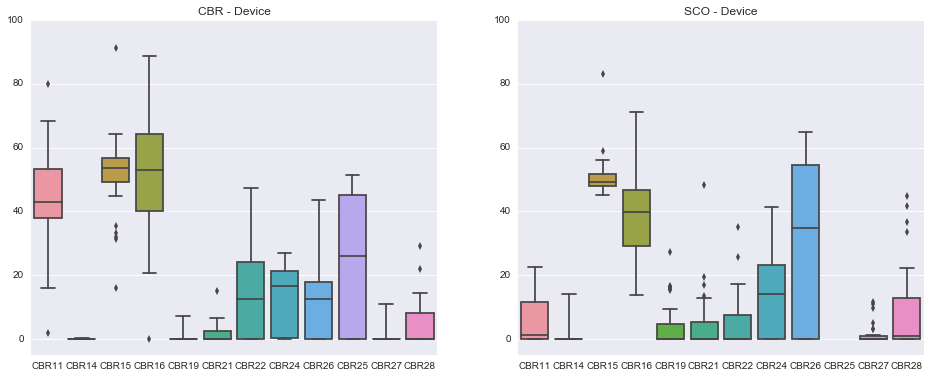

In [118]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121); plt.ylim(-5,100); ax1.set_title('CBR - Device')
ax2 = fig.add_subplot(122); plt.ylim(-5,100); ax2.set_title('SCO - Device')
sns.boxplot(CBR,ax=ax1)
sns.boxplot(SCO,ax=ax2)

**It seems that some people (CBR14,19,21,27) did not use the Cbr at all or very little (median time ~ 0). Others used it moderately (CBR22,24,26, median ~ 15%). CBR11,15,16 used it more (median ~ 40,50% daily wear time).**

**Usage within individuals looks consistent across the 2 braces (SCO and CBR), i.e. if an individual did not use the Cbr he/she also did not use much the SCO. However there are some exceptions, such as CBR11 and CBR22 who seemed to use more the Cbr than the SCO**

# Are there days where usage is preferred?

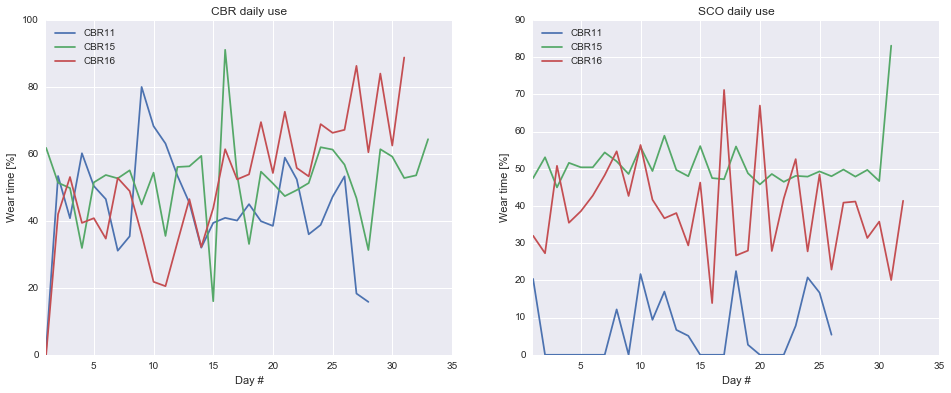

In [119]:
#high usage patients
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121); 
ax2 = fig.add_subplot(122); 
CBR[['CBR11','CBR15','CBR16']].plot(ax=ax1); ax1.set_xlabel('Day #'); ax1.set_ylabel('Wear time [%]'); 
ax1.set_title('CBR daily use')
SCO[['CBR11','CBR15','CBR16']].plot(ax=ax2); ax2.set_xlabel('Day #'); ax2.set_ylabel('Wear time [%]')
ax2.set_title('SCO daily use')

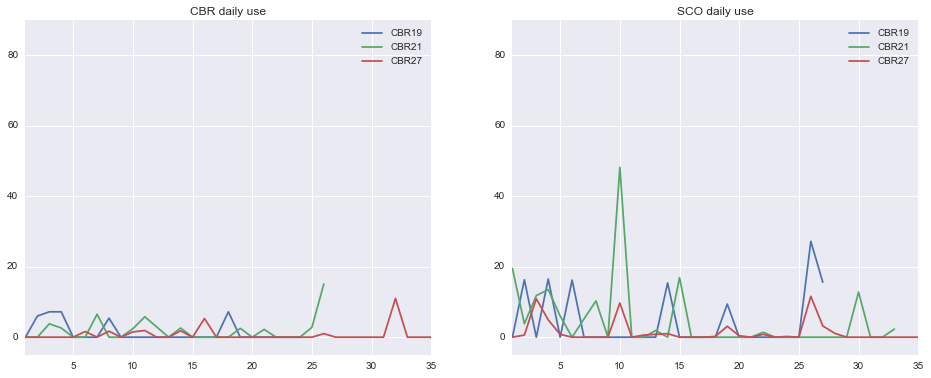

In [120]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121); 
ax2 = fig.add_subplot(122); 
CBR[['CBR19','CBR21','CBR27']].plot(ax=ax1); ax1.set_ylim(-5,90); ax1.set_title('CBR daily use')
SCO[['CBR19','CBR21','CBR27']].plot(ax=ax2); ax2.set_ylim(-5,90); ax2.set_title('SCO daily use')

**People who used the brace less seems to use it intermittently**

## Daily Steps and Wear time (Device)

In [ ]:
Weartime

In [121]:
Steps = pd.read_csv('Summary Steps.csv')
print len(Steps)
Steps.head()

765


,Subject,SubjID,Brace,Actigraph,Day of Week,Day of Week Num,Steps Counts,Steps Per Minute
0,CBR 11 home SCO on device,11,SCO,Waist,Wednesday,3,690,1.4
1,CBR 11 home SCO on device,11,SCO,Waist,Thursday,4,1301,4.4
2,CBR 11 home SCO on device,11,SCO,Waist,Tuesday,2,0,0.0
3,CBR 11 home SCO on device,11,SCO,Waist,Thursday,4,549,3.1
4,CBR 11 home SCO on device,11,SCO,Waist,Saturday,6,196,0.6


In [122]:
Steps[Steps.SubjID==11].Brace.unique()

array(['SCO', 'CBR'], dtype=object)

In [123]:
#remove Waist data
Steps = Steps[Steps.Actigraph!='Waist']

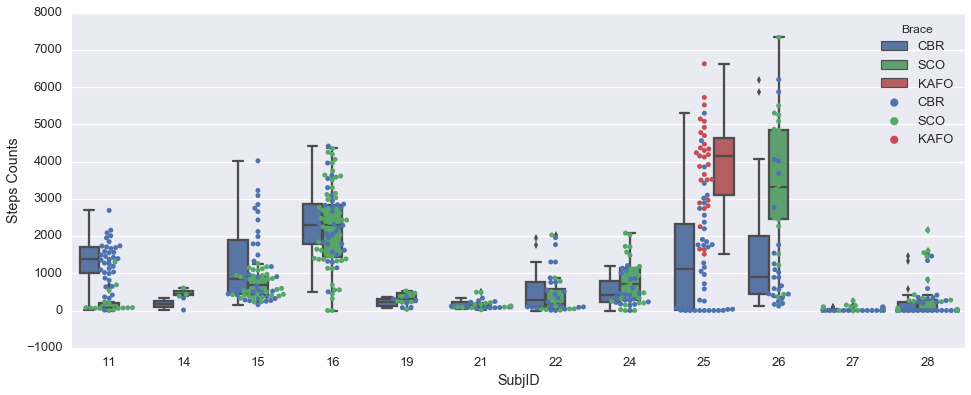

In [124]:
sns.set_context('talk')
fig = plt.figure(figsize=(16,6))
ax = sns.boxplot(x='SubjID',y='Steps Counts',hue='Brace',data=Steps)
ax = sns.swarmplot(x='SubjID',y='Steps Counts',hue='Brace',data=Steps)

**Only 4 participants (11,16,25,26) have a median # of steps > 1000. All others have medians between 0 and 500**

(-2, 20)

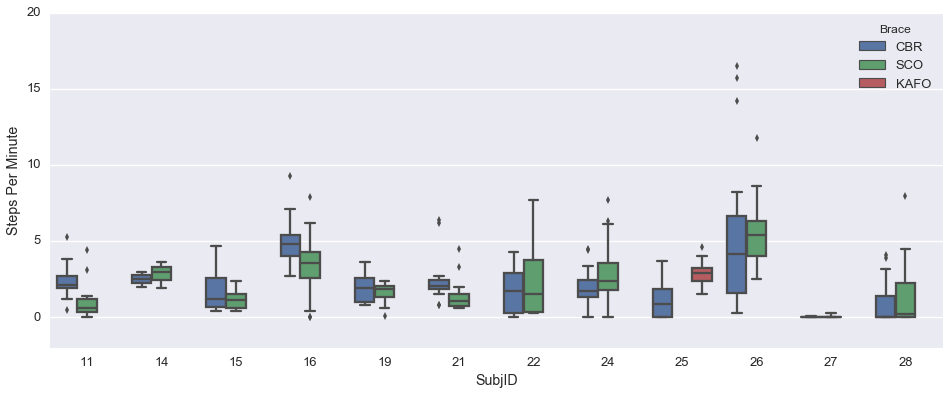

In [125]:
fig = plt.figure(figsize=(16,6))
ax = sns.boxplot(x='SubjID',y='Steps Per Minute',hue='Brace',data=Steps)
# ax = sns.swarmplot(x='SubjID',y='Steps Per Minute',hue='Brace',data=Steps)
plt.ylim([-2, 20])

In [126]:
#t-test - TO DO
from scipy import stats

# Waist vs Device wear time

In [127]:
weartime = pd.read_csv('WearTimes_Waist.csv',header=[0,1])

In [128]:
weartime.head(4)

Unnamed: 0_level_0     CBR11               CBR14               CBR15  \
                Days SCO-Waist CBR-Waist SCO-Waist CBR-Waist SCO-Waist   
0                  1      86.6      81.6      97.8      30.7      88.0   
1                  2      39.8      16.3       0.0       0.0      56.3   
2                  3      22.3      62.8      47.8       0.0      60.6   
3                  4      17.3      21.9       0.2       1.8      53.6   

                CBR16               CBR19    ...        CBR24            \
  CBR-Waist SCO-Waist CBR-Waist SCO-Waist    ...    SCO-Waist CBR-Waist   
0      84.6      69.5     100.0      48.7    ...         14.1      55.1   
1      66.6      34.4       3.8       0.0    ...         22.8      31.7   
2      58.1      27.3      42.8      35.1    ...         33.8      32.2   
3      53.5      53.6      61.3       3.8    ...         28.8      25.5   

      CBR26               CBR25               CBR27               CBR28  \
  SCO-Waist CBR-Waist CBR-Waist SCO-Waist SCO-Waist CBR-Waist SCO-Waist   
0      85.2      29.2      11.6       NaN      54.4      13.1      44.9   
1      34.7       9.0      26.2       NaN       0.0       0.9       0.0   
2      16.1       0.0      31.5       NaN       0.0       0.0       6.5   
3      12.6       6.7      41.0       NaN      10.8       0.3       1.9   

             
  CBR-Waist  
0      39.2  
1       6.3  
2       0.8  
3       1.0  

[4 rows x 25 columns]

In [129]:
weartime = weartime.drop('Unnamed: 0_level_0',axis=1)
weartime = weartime.T

/Users/luca/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  if __name__ == '__main__':


In [130]:
SCOw = weartime.iloc[0::2]
SCOw = SCOw.drop(SCOw.columns[0], axis=1) #drop day 0 (lab)
SCOw = SCOw.T
SCOw.columns = SCOw.columns.droplevel(level=1)
SCOw.head(4)

,CBR11,CBR14,CBR15,CBR16,CBR19,CBR21,CBR22,CBR24,CBR26,CBR25,CBR27,CBR28
1,39.8,0.0,56.3,34.4,0.0,41.9,0.0,22.8,34.7,26.2,0.0,0.0
2,22.3,47.8,60.6,27.3,35.1,59.4,0.0,33.8,16.1,31.5,0.0,6.5
3,17.3,0.2,53.6,53.6,3.8,47.2,21.2,28.8,12.6,41.0,10.8,1.9
4,31.6,0.0,59.3,34.9,16.9,55.2,0.0,0.0,29.7,2.7,5.7,0.4


In [131]:
CBRw = weartime.iloc[1::2]
CBRw = CBRw.drop(CBRw.columns[0],axis=1) #drop day 0 (lab)
CBRw = CBRw.T
CBRw.columns = CBRw.columns.droplevel(level=1)
CBRw.head(4)

,CBR11,CBR14,CBR15,CBR16,CBR19,CBR21,CBR22,CBR24,CBR26,CBR25,CBR27,CBR28
1,16.3,0.0,66.6,3.8,0.3,17.4,0.0,31.7,9.0,NaN,0.9,6.3
2,62.8,0.0,58.1,42.8,9.3,33.9,0.0,32.2,0.0,NaN,0.0,0.8
3,21.9,1.8,53.5,61.3,7.1,0.0,0.0,25.5,6.7,NaN,0.3,1.0
4,52.9,0.0,50.3,54.5,11.6,50.6,0.2,0.0,11.6,NaN,0.4,3.6


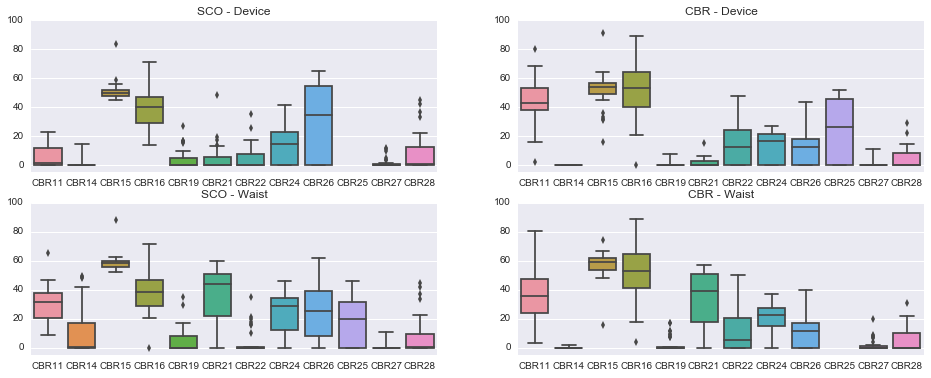

In [132]:
fig = plt.figure(figsize=(16,6))
sns.set_context('notebook')
ax1 = fig.add_subplot(221); plt.ylim(-5,100); ax1.set_title('SCO - Device')
ax2 = fig.add_subplot(222); plt.ylim(-5,100); ax2.set_title('CBR - Device')
ax3 = fig.add_subplot(223); plt.ylim(-5,100); ax3.set_title('SCO - Waist')
ax4 = fig.add_subplot(224); plt.ylim(-5,100); ax4.set_title('CBR - Waist')
sns.boxplot(SCO,ax=ax1)
sns.boxplot(CBR,ax=ax2)
sns.boxplot(SCOw,ax=ax3)
sns.boxplot(CBRw,ax=ax4)

**For most subjects, the daily wear time recorded by the waist Actigraph matches that of the device Actigraph. In some cases (11,21,25 SCO) the median wear time from the Waist device is higher than that of the brace, indicating they have been active without using the brace**

ValueError: cannot convert float NaN to integer

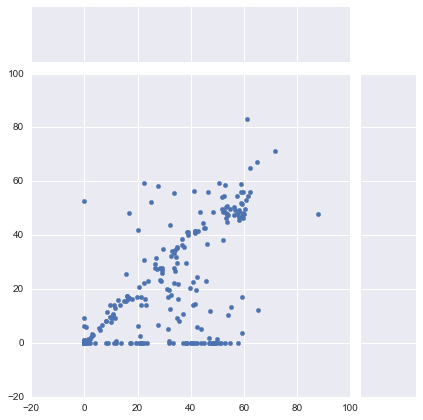

In [133]:
g = sns.jointplot(SCOw,SCO)

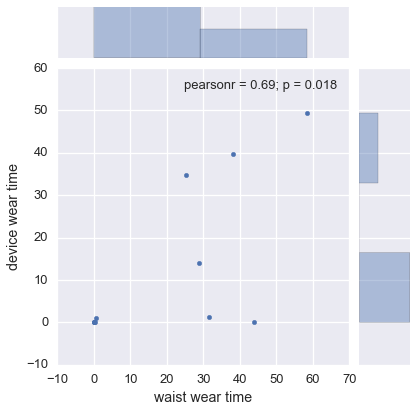

In [134]:
sns.set_context('talk')
medianSCO = SCO.median(axis=0)
medianSCOw = SCOw.median(axis=0)
g = sns.jointplot(medianSCOw,medianSCO)
g.set_axis_labels('waist wear time','device wear time')

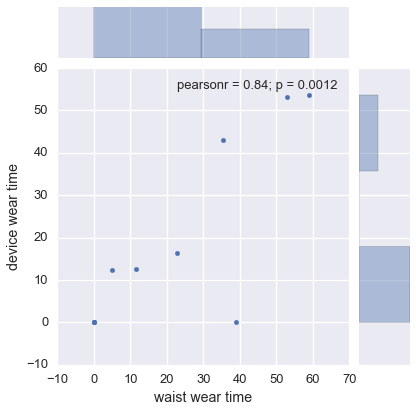

In [135]:
sns.set_context('talk')
medianCBR = CBR.median(axis=0)
medianCBRw = CBRw.median(axis=0)
g = sns.jointplot(medianCBRw,medianCBR)
g.set_axis_labels('waist wear time','device wear time')

ValueError: cannot convert float NaN to integer

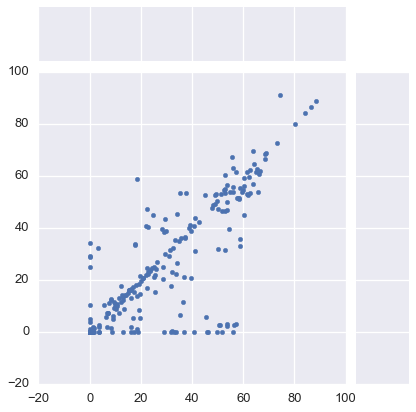

In [136]:
sns.jointplot(CBRw,CBR)